In [2]:
from sklearn.mixture import sample_gaussian
from IPython import display
from sklearn.mixture import GMM
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import math
import random
import time
import pylab as pl

In [101]:
gmm = GMM(n_components=2, n_iter=1)

gmm.weights_ = np.array([0.4, 0.6])
gmm.means_ = np.array([[2], [-3]])
gmm.covars_ = np.array([[3], [1]])

In [102]:
mixture_sample = gmm.sample(1000)

In [76]:
x = np.linspace(-5, 6, 100)

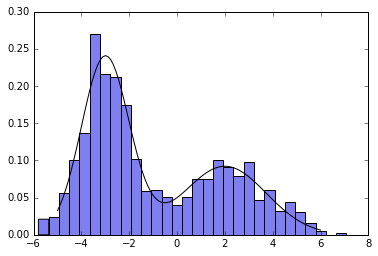

In [103]:
plt.hist(mixture_sample, bins=30, normed=True, color=(0, 0, 0.9, 0.5))
plt.plot(x, (0.4 * mlab.normpdf(x, 2, math.sqrt(3)) + 0.6 * mlab.normpdf(x, -3, math.sqrt(1))), c=(0, 0, 0))

plt.show()

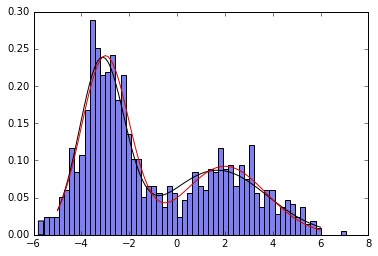

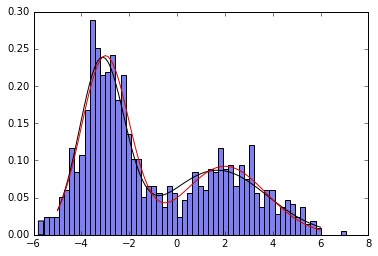

In [121]:
n = 1000
alpha = np.array([0.1, 0.9])
mu = np.array([0, 0])
sigma = np.array([1, 2])
# while True:
for i in range(1000):
    r_ik = ((1 / mlab.normpdf(mixture_sample, mu, np.sqrt(sigma)).sum(axis=1).reshape(-1, 1)) * 
            (mlab.normpdf(mixture_sample, mu, np.sqrt(sigma))))
    n_k = r_ik.sum(axis=0)
    alpha_k = n_k / n
    mu_k = ((1 / n_k) * (mixture_sample.T.dot(r_ik))).flatten()
    c_k = ((1 / n_k) * (mixture_sample.T ** 2).dot(r_ik) - mu_k ** 2).flatten()
#    pl.plot(x, (alpha_k[0] * mlab.normpdf(x, mu_k[0], math.sqrt(c_k[0])) +
#                 alpha_k[1] * mlab.normpdf(x, mu_k[1], math.sqrt(c_k[1]))), c=(0, 0, 0))
    
#    display.clear_output(wait=True)
#    display.display(pl.gcf())
#    time.sleep(3)
    if np.linalg.norm(np.hstack((alpha_k, mu_k, c_k)) - np.hstack((alpha, mu, sigma))) < 1e-4:
        break
    alpha = alpha_k
    mu = mu_k
    sigma = c_k
pl.plot(x, (alpha_k[0] * mlab.normpdf(x, mu_k[0], math.sqrt(c_k[0])) +
                 alpha_k[1] * mlab.normpdf(x, mu_k[1], math.sqrt(c_k[1]))), c=(0, 0, 0))
pl.plot(x, (0.4 * mlab.normpdf(x, 2, math.sqrt(3)) + 0.6 * mlab.normpdf(x, -3, math.sqrt(1))), c=(0.9, 0, 0))
pl.hist(mixture_sample, bins=60, normed=True, color=(0, 0, 0.9, 0.5))
display.clear_output(wait=True)
display.display(pl.gcf())